In [2]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
df=pd.read_csv("C:\DSProject\goldfinal\gold2024.csv")
df

,date,price
0,2016-01-01,2252.600000
1,2016-01-02,2454.500000
2,2016-01-03,2708.100000
3,2016-01-04,2577.800000
4,2016-01-05,2597.750000
...,...,...
2712,2024-02-23,5498.000000
2713,2024-02-26,5498.000000
2714,2024-02-27,5514.950195
2715,2024-02-28,5514.899902


EDA

In [4]:
df.describe()

,price
count,2717.000000
mean,3614.946219
std,944.869865
min,2252.600000
25%,2738.200000
50%,3385.000000
75%,4404.200000
max,5833.000000


In [5]:
df.isna().sum()

date     0
price    0
dtype: int64

In [6]:
df.isnull().sum()

date     0
price    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2717 entries, 0 to 2716
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2717 non-null   object 
 1   price   2717 non-null   float64
dtypes: float64(1), object(1)
memory usage: 42.6+ KB


In [8]:
#Convert 'Date' Column to date time index 
df['date']=pd.to_datetime(df['date'])

In [9]:
df['date']

0      2016-01-01
1      2016-01-02
2      2016-01-03
3      2016-01-04
4      2016-01-05
          ...    
2712   2024-02-23
2713   2024-02-26
2714   2024-02-27
2715   2024-02-28
2716   2024-02-29
Name: date, Length: 2717, dtype: datetime64[ns]

In [10]:
df.head()

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75


In [11]:
df.set_index('date',inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2717 entries, 2016-01-01 to 2024-02-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   2717 non-null   float64
dtypes: float64(1)
memory usage: 42.5 KB


In [13]:
df.index

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2024-02-16', '2024-02-19', '2024-02-20', '2024-02-21',
               '2024-02-22', '2024-02-23', '2024-02-26', '2024-02-27',
               '2024-02-28', '2024-02-29'],
              dtype='datetime64[ns]', name='date', length=2717, freq=None)

Text(0, 0.5, 'Price')

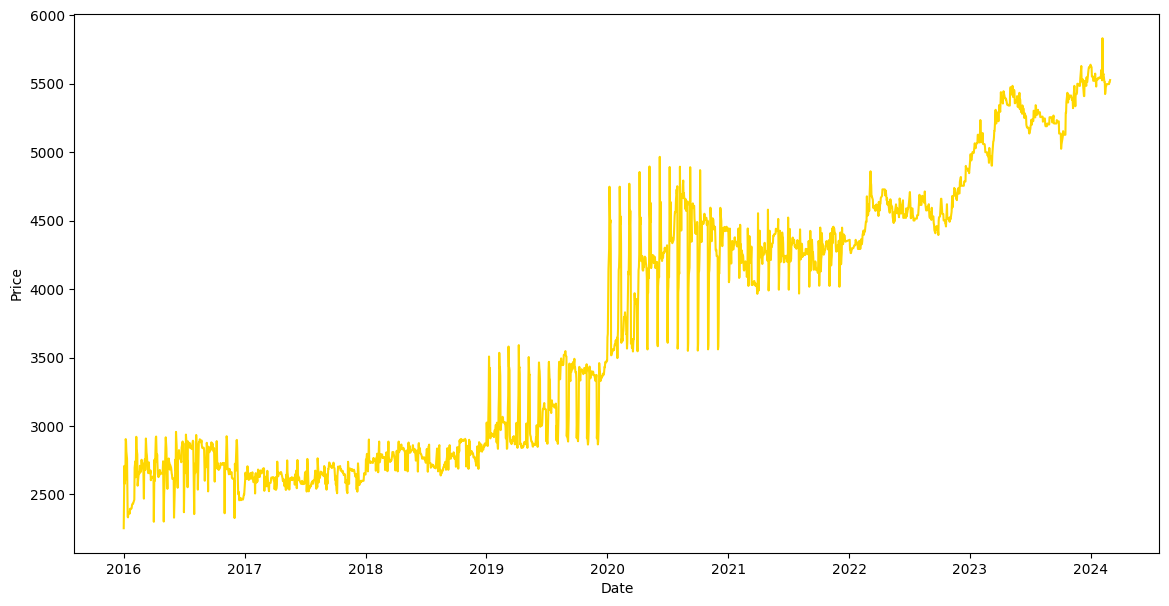

In [14]:
#plot the data
plt.figure(figsize=(14,7))
plt.plot(df.index,df['price'],color='Gold')
plt.xlabel("Date")
plt.ylabel("Price")

ADF(Augmented Dickey-Fuller)

In [15]:
from statsmodels.tsa.stattools import adfuller

In [16]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics:{}'.format(result[0]))
    print('p-value:{}'.format(result[1]))
    if result[1]<=0.05:
        print("strong evidence against the null hypothesis,reject the null hypothesis.Data has no unit root and  it is stationary")
    else:
        print("weak evidence against null hypothesis ,time series has a unit root,indicating it is non-stationary")

In [17]:
adf_test(df['price'])

ADF Statistics:1.4167523040450656
p-value:0.9971889318595093
weak evidence against null hypothesis ,time series has a unit root,indicating it is non-stationary


Augmented Dickey-Fuller test result

The Augmented Dickey-Fuller test is used to check if the time series is stationary or not. If the p-value is less than 0.05, we reject the null hypothesis and it the p-value is greater than 0.05 then the time series is stationary.

h0=data is not stationary

h1=data is stationary

Here the p_value is greater than 0.05 so we are accepting null hypothesis,i.e data is not stationary.


Converting Non stationary to stationary

difference between the price values in a DataFrame column and the preceding values.

In [18]:
#use technique  differencing
df_diff=df['price']-df['price'].shift(1)

In [19]:
df_diff

date
2016-01-01           NaN
2016-01-02    201.900000
2016-01-03    253.600000
2016-01-04   -130.300000
2016-01-05     19.950000
                 ...    
2024-02-23      0.000000
2024-02-26      0.000000
2024-02-27     16.950195
2024-02-28     -0.050293
2024-02-29     12.399902
Name: price, Length: 2717, dtype: float64

In [20]:
df_diff.dropna(inplace=True)

In [21]:
df_diff

date
2016-01-02    201.900000
2016-01-03    253.600000
2016-01-04   -130.300000
2016-01-05     19.950000
2016-01-06     19.950000
                 ...    
2024-02-23      0.000000
2024-02-26      0.000000
2024-02-27     16.950195
2024-02-28     -0.050293
2024-02-29     12.399902
Name: price, Length: 2716, dtype: float64

In [22]:
adf_test(df_diff.dropna())

ADF Statistics:-28.386744246882365
p-value:0.0
strong evidence against the null hypothesis,reject the null hypothesis.Data has no unit root and  it is stationary


we perform Augmented Dickey-Fuller test on this difference data.This is an Stationary Data Because The p-values is less than 0.05 reject the null Hypothesis It is an Stationary Data

Seasonality Trend

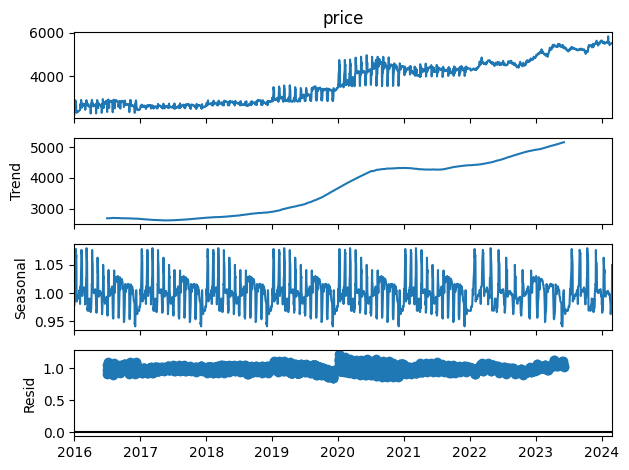

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['price'], model='multiplicative', period=365)
result.plot()
plt.show()

In [24]:
df

,price
date,
2016-01-01,2252.600000
2016-01-02,2454.500000
2016-01-03,2708.100000
2016-01-04,2577.800000
2016-01-05,2597.750000
...,...
2024-02-23,5498.000000
2024-02-26,5498.000000
2024-02-27,5514.950195


ACF and PACF Plot

In [25]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

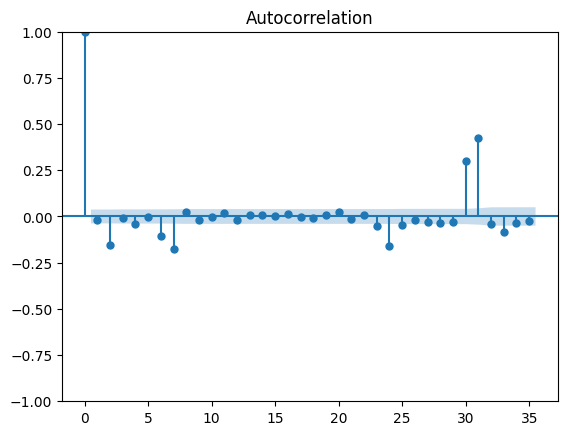

In [26]:
acf=plot_acf(df_diff.dropna())

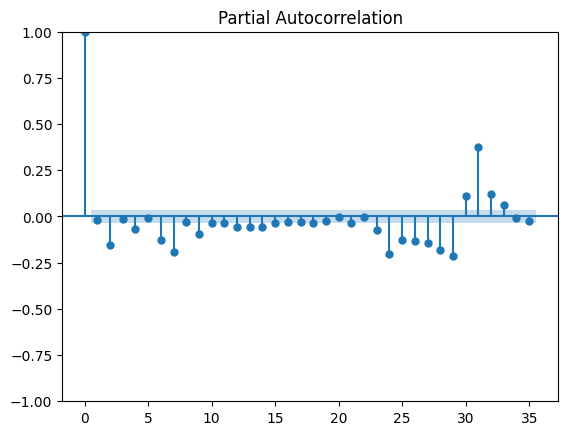

In [27]:
pacf=plot_pacf(df_diff.dropna()) 

In [28]:
df

,price
date,
2016-01-01,2252.600000
2016-01-02,2454.500000
2016-01-03,2708.100000
2016-01-04,2577.800000
2016-01-05,2597.750000
...,...
2024-02-23,5498.000000
2024-02-26,5498.000000
2024-02-27,5514.950195


ARIMA(AutoRegressive Integrated Moving Average)

In [29]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA


order=(p,d,q)

In [30]:
# model_ARIMA=ARIMA(df_diff,order=(10,1,0))

In [31]:
# model_Arima_fit=model_ARIMA.fit()

In [32]:
# model_Arima_fit.summary()

Prediction

In [33]:
# ##Prediction
# pred_start_date=df.index[0]
# pred_end_date=df.index[-1]
# # print(pred_start_date)
# # print(pred_end_date)

In [34]:
# pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
# residuals=df_diff-pred

In [35]:
# pred

In [36]:
# pred

In [37]:
# model_Arima_fit.resid.plot(kind='kde')

In [38]:
from pmdarima import auto_arima


In [39]:
stepwise_fit=auto_arima(df['price'],trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=32705.088, Time=2.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=32957.173, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=32958.260, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=32957.852, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=32955.536, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=32715.608, Time=1.83 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=32719.372, Time=1.49 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=32717.621, Time=2.63 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=32707.001, Time=3.33 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=32743.487, Time=1.05 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=32711.505, Time=2.49 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=32716.176, Time=3.10 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=32693.210, Time=4.76 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=32670.239, Time=4.26 sec
 ARIMA(4,1,2)(0,0,0

In [40]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2717
Model:               SARIMAX(5, 1, 5)   Log Likelihood              -16296.756
Date:                Wed, 03 Jul 2024   AIC                          32617.512
Time:                        14:28:13   BIC                          32688.394
Sample:                             0   HQIC                         32643.137
                               - 2717                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.2968      0.438      2.960      0.003       0.438       2.155
ar.L1         -0.4727      0.018    -26.747      0.000      -0.507      -0.438
ar.L2         -0.5111      0.020    -25.944      0.000      -0.550      -0.472
ar.L3         -0.0121      0.025     -0.489      0.625      -0.061       0.036
ar.L4          0.0807      0.019      4.178      0.000       0.043       0.119
ar.L5          0.7869      0.015     51.731      0.000       0.757       0.817
ma.L1          0.3434      0.015     23.553      0.000       0.315       0.372
ma.L2          0.2710      0.015     18.512      0.000       0.242       0.300
ma.L3         -0.2208      0.015    -14.479      0.000      -0.251      -0.191
ma.L4         -0.3047      0.013    -22.728      0.000      -0.331      -0.278
ma.L5         -0.9075      0.011    -79.318      0.000      -0.930      -0.885
sigma2      1.002e+04    129.005     77.707      0.000    9771.712    1.03e+04
===================================================================================
Ljung-Box (L1) (Q):                   6.14   Jarque-Bera (JB):             59691.73
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               1.17   Skew:                            -1.49
Prob(H) (two-sided):                  0.02   Kurtosis:                        25.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [41]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA

In [42]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)

(2717, 1)
(2687, 1) (30, 1)


In [43]:
model=ARIMA(train['price'],order=(5,1,5))
model=model.fit()

c:\Users\Shree\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Shree\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Shree\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Shree\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible startin

In [44]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  price   No. Observations:                 2687
Model:                 ARIMA(5, 1, 5)   Log Likelihood              -16140.026
Date:                Wed, 03 Jul 2024   AIC                          32302.052
Time:                        14:28:18   BIC                          32366.906
Sample:                             0   HQIC                         32325.511
                               - 2687                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4854      0.019    -26.117      0.000      -0.522      -0.449
ar.L2         -0.4805      0.024    -19.681      0.000      -0.528      -0.433
ar.L3          0.0159      0.026      0.614      0.539      -0.035       0.067
ar.L4          0.0722      0.020      3.698      0.000       0.034       0.111
ar.L5          0.7881      0.015     51.999      0.000       0.758       0.818
ma.L1          0.3559      0.019     18.393      0.000       0.318       0.394
ma.L2          0.2431      0.023     10.799      0.000       0.199       0.287
ma.L3         -0.2576      0.021    -12.511      0.000      -0.298      -0.217
ma.L4         -0.2652      0.021    -12.591      0.000      -0.306      -0.224
ma.L5         -0.8941      0.017    -52.023      0.000      -0.928      -0.860
sigma2      1.006e+04    127.365     78.950      0.000    9805.903    1.03e+04
===================================================================================
Ljung-Box (L1) (Q):                   7.33   Jarque-Bera (JB):             64962.23
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               1.31   Skew:                            -1.56
Prob(H) (two-sided):                  0.00   Kurtosis:                        26.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [45]:
#prediction for testing data
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,type='levels')
pred.index=df.index[start:end+1]
print(pred)

date
2024-01-17    5517.149893
2024-01-18    5500.780541
2024-01-19    5500.664797
2024-01-23    5502.855448
2024-01-24    5495.648700
2024-01-25    5486.782691
2024-01-29    5481.674380
2024-01-30    5488.365873
2024-01-31    5488.637326
2024-02-01    5478.889362
2024-02-02    5476.240354
2024-02-05    5478.671447
2024-02-06    5483.902311
2024-02-07    5479.663115
2024-02-08    5471.372466
2024-02-09    5475.604252
2024-02-12    5479.760023
2024-02-13    5479.394115
2024-02-14    5473.702595
2024-02-15    5470.478812
2024-02-16    5478.407410
2024-02-19    5479.266319
2024-02-20    5474.289308
2024-02-21    5471.700042
2024-02-22    5473.393766
2024-02-23    5480.047064
2024-02-26    5476.280315
2024-02-27    5470.829453
2024-02-28    5473.472395
2024-02-29    5476.564063
Name: predicted_mean, dtype: float64


c:\Users\Shree\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Shree\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\Shree\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['type']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='date'>

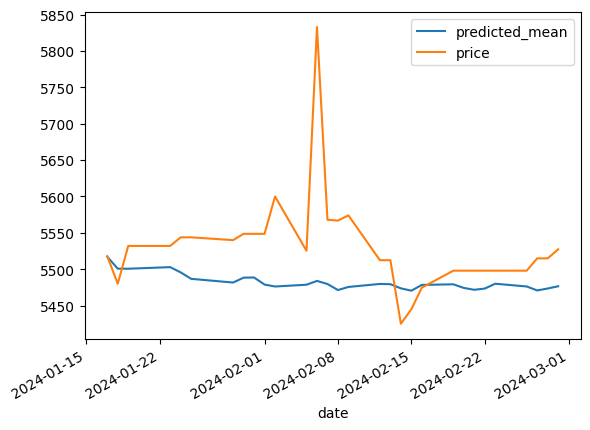

In [46]:
pred.plot(legend=True)
test['price'].plot(legend=True)

<Axes: ylabel='Density'>

<Figure size 1800x700 with 0 Axes>

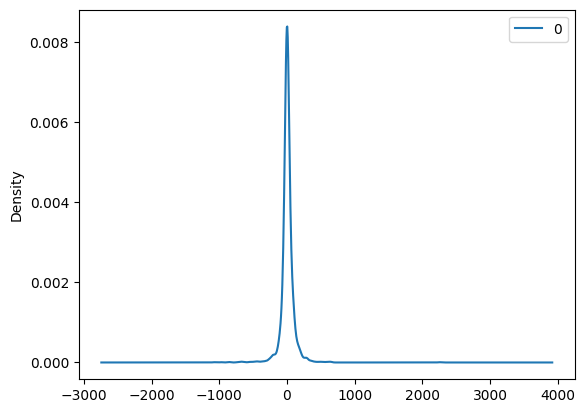

In [47]:
plt.figure(figsize=(18,7))
from pandas import DataFrame
residual=DataFrame(model.resid)
# residual=model.resid
residual.plot(kind='kde')

In [48]:
test['price'].mean()

5530.578678385416

In [49]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['price']))
print(rmse)

82.4105058689427


In [50]:
# model2=ARIMA(df['price'],order=(1,1,5))
# model2=model2.fit()

For Future dates

In [51]:
index_future_dates=pd.date_range(start='2024-02-29',end='2024-04-29')
#print(index_future_dates)
pred=model.predict(start=len(df),end=len(df)+60,typ='levels').rename('ARIMA Prediction')
# print(comp_pred)
pred.index=index_future_dates
print(pred)

2024-02-29    5478.678284
2024-03-01    5472.846486
2024-03-02    5470.605488
2024-03-03    5476.834920
2024-03-04    5477.384649
                 ...     
2024-04-25    5476.937147
2024-04-26    5475.247168
2024-04-27    5473.400127
2024-04-28    5474.263367
2024-04-29    5474.600062
Freq: D, Name: ARIMA Prediction, Length: 61, dtype: float64


c:\Users\Shree\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Shree\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\Shree\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<Axes: >

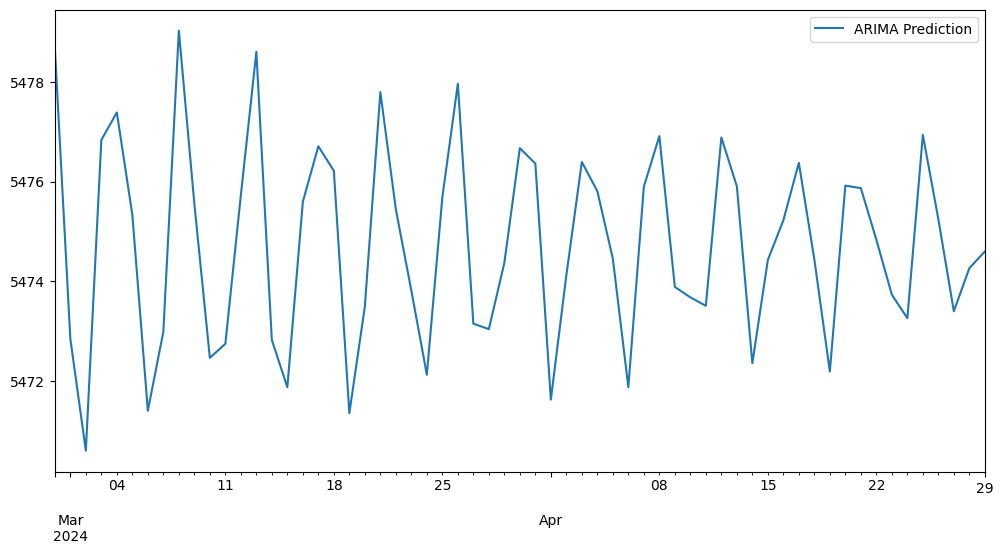

In [52]:
pred.plot(figsize=(12,6),legend=True)

In [53]:
import pickle
pickle.dump(model,open('final_model.pkl','wb'))

In [54]:
pickle.dump(pred,open('final_pred.pkl','wb'))

RNN(Recurent Neural Network)

SARIMAX

In [55]:
# from statsmodels.tsa.statespace.sarimax import SARIMAX

In [56]:
# model_sarima=SARIMAX(df_diff,order=(1,0,1),seasonal_order=(0,1,0,12))

In [57]:
# model_sarima_fit=model_sarima.fit()

In [58]:
# model_sarima_fit.summary()

In [59]:
# ##Prediction
# pred_start_date=df.index[0]
# pred_end_date=df.index[-1]
# print(pred_start_date)
# # print(pred_end_date)

In [60]:
# pred_sarima=model_sarima_fit.predict(start=pred_start_date,end=pred_end_date)
# residuals=df_diff-pred_sarima

In [61]:
# model_sarima_fit.resid.plot()

In [62]:
# model_sarima_fit.resid.plot(kind='kde')

SARIMAX

Seasonal Auto Regressive Integrated Moving Average with eXogenous regression model

AR Order:Lags in the auto regressive model

MA order:moving average lags


Integrated order:differencing Integration Order

Seasonal Order:(Seasonal AR specification,seasonal Integration Order,Seasonal MA,Seasonal periodity)

eXogenous regressor model

In [63]:
# import statsmodels.api as sm

In [64]:
# model_sarimax=sm.tsa.statespace.SARIMAX(train,order=(1,1,1),seasonal_order=(1,1,1,12))
# model_sarimax_fit=model_sarimax.fit()

In [65]:
# # prediction=model_sarimax_fit.predict(start='2024-02-29',end='2024-03-30')
# index_future_dates_sarimax=pd.date_range(start='2024-02-29',end='2024-03-30')
# #print(index_future_dates)
# prediction=model_sarimax_fit.predict(start=len(df),end=len(df)+30,typ='levels').rename('SARIMAX Prediction')
# # print(comp_pred)
# prediction.index=index_future_dates_sarimax
# print(prediction)

In [66]:
# prediction = prediction[:-1]

In [67]:
# from sklearn.metrics import mean_squared_error
# import numpy as np
# if len(prediction) < len(test):
#     prediction = np.pad(prediction, (0, len(test) - len(prediction)), 'constant')
# rmse_SARIMAX=np.sqrt(mean_squared_error(test,prediction))
# print(rmse_SARIMAX)

In [68]:
# predict=np.exp(prediction)
# test_set=np.exp(test)
# plt.plot(test_set)
# plt.plot(predict,color='red')
# plt.show()

In [69]:
# prediction_series = pd.Series(prediction)
# prediction_series.plot(legend=True,label='Prediction')
# test['price'].plot(legend=True,label='Test Data')

In [70]:
# plt.figure(figsize=(18,7))
# from pandas import DataFrame
# residualsarimax=DataFrame(model_sarimax.resid)
# # residual=model.resid
# residualsarimax.plot(kind='kde')

Pickling the model file for deployement

In [71]:
# import pickle

Write Byte Mode

In [72]:
# pickle.dump(pred,open('pred.pkl','wb'))

Read Byte Mode

In [73]:
# pickled_model=pickle.load(open('pred.pkl','rb'))

In [74]:
# pickled_model.predict(index_future_dates)